# KMeans로 분류해서 th 중앙값 찾기

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import subprocess as sp
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

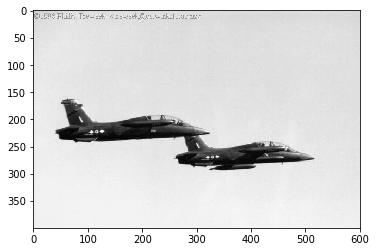

(400, 601)


In [2]:
img = cv2.imread('0001.jpg', 0)   # 운이 좋게 127이라는 조건에 만족함. 잘 나뉘어짐.
imshow("", img)
print(img.shape)

In [3]:
from sklearn.cluster import KMeans
X = img.flatten().reshape(-1,1)
print(X.shape)

(240400, 1)


In [4]:
model = KMeans(n_clusters =2, init='random', max_iter = 20).fit(X)
p = model.cluster_centers_
print(p)

[[229.68802768]
 [ 47.60874194]]


In [5]:
th = (p[1,0] + p[0,0]) / 2.0
print(th)

138.64838481156278


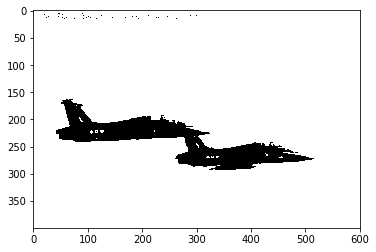

In [6]:
img = (img > th)*255
imshow('',img)

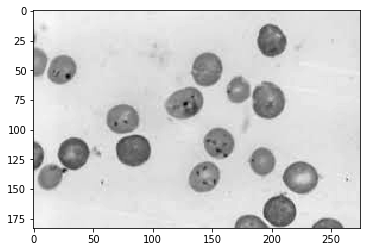

(183, 275)


In [7]:
img = cv2.imread('cells.jpg', 0)   # 운이 좋게 127이라는 조건에 만족함. 잘 나뉘어짐.
imshow("", img)
print(img.shape)

In [8]:
from sklearn.cluster import KMeans
X = img.flatten().reshape(-1,1)  # 다시 2차원행렬로 만들어줘야 함 -> KMeans 할려면 / (a,1) 형태의 행렬로..
print(X.shape)
print(X)

(50325, 1)
[[244]
 [244]
 [244]
 ...
 [230]
 [230]
 [230]]


In [9]:
model = KMeans(n_clusters = 2, init='random', max_iter = 20).fit(X)  # fit 함수 -> 훈련 시키기
p = model.cluster_centers_   # 중앙값 찾기
print(p)                     # 127을 중앙값으로 밝기가 나눠지지 않을때.

[[145.02825692]
 [225.87774914]]


In [11]:
th = (p[1,0] + p[0,0]) / 2.0
print(th)

185.45300303059958


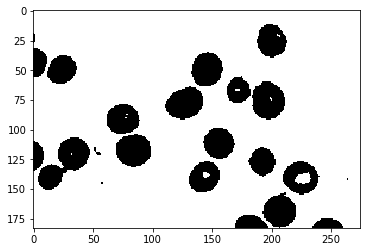

In [12]:
img = (img > th) * 255
imshow('', img)